<h2> Lab 6

In [4]:
#Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(2)
#Keras/TensorFlow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Add, ReLU, BatchNormalization
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
#Keras image processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#sklearn for classification metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns #to plot the confusion matrix
# PyTorch Tools (for Question 5)
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # Import functional module for activations
torch.manual_seed(2)

import os

train_path='./xray/train/'
val_path='./xray/val/'
test_path='./xray/test/'
predict_path='./xray/predict/'



<h3> Exercise Set 1

Setup:
$$
    X =
    \begin{bmatrix}
        1 & 2 & 1 \\
        0 & 1 & 3 \\
        2 & 1 & 0
    \end{bmatrix}
$$
$$
    F =
    \begin{bmatrix}
        1 & -1 \\
        0 & 2
    \end{bmatrix}
$$
$$
    T =
    \begin{bmatrix}
        2 & 5 \\
        3 & 0
    \end{bmatrix}
$$

Forward Pass:
$$
    O =
    \begin{bmatrix}
        1 & ? \\
        ? & ?
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 & 2 \\
        0 & 1
    \end{bmatrix}
    *
    \begin{bmatrix}
        1 & -1 \\
        0 & 2
    \end{bmatrix}
$$
$$
    O =
    \begin{bmatrix}
        1 & 7 \\
        ? & ?
    \end{bmatrix}
    =
    \begin{bmatrix}
        2 & 1 \\
        1 & 3
    \end{bmatrix}
    *
    \begin{bmatrix}
        1 & -1 \\
        0 & 2
    \end{bmatrix}
$$
$$
    O =
    \begin{bmatrix}
        1 & 7 \\
        1 & ?
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 & 1 \\
        2 & 1
    \end{bmatrix}
    *
    \begin{bmatrix}
        1 & -1 \\
        0 & 2
    \end{bmatrix}
$$
$$
    O =
    \begin{bmatrix}
        1 & 7 \\
        1 & -2
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 & 3 \\
        1 & 0
    \end{bmatrix}
    *
    \begin{bmatrix}
        1 & -1 \\
        0 & 2
    \end{bmatrix}
$$

ReLU:
$$
    O =
    \begin{bmatrix}
        1 & 7 \\
        1 & 0
    \end{bmatrix}
$$


Loss:
$$
    L =
    \begin{bmatrix}
        (2-1)^2 & (5-7)^2 \\
        (3-1)^2 & (0-0)^2
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 & 4 \\
        4 & 0
    \end{bmatrix}
$$

Backpropagation
$$
    \frac{\delta L}{\delta F} =
    \frac{\delta O}{\delta F} 
    \frac{\delta L}{\delta O}
$$
$$
    \frac{\delta L}{\delta F} =
    \begin{bmatrix}
        \frac{\delta L}{\delta O}
        \begin{bmatrix}
            1 & 2 \\
            0 & 1
        \end{bmatrix} & 
        \frac{\delta L}{\delta O}
        \begin{bmatrix}
            2 & 1 \\
            1 & 3
        \end{bmatrix} \\
        \frac{\delta L}{\delta O}
        \begin{bmatrix}
            0 & 1 \\
            2 & 1
        \end{bmatrix} & 
        \frac{\delta L}{\delta O}
        \begin{bmatrix}
            1 & 3 \\
            1 & 0
        \end{bmatrix} \\
    \end{bmatrix}
$$
$$
    \frac{\delta L}{\delta O_{11}} =
    2(2-1) = 2
$$
$$
    \frac{\delta L}{\delta O_{12}} =
    2(5-7) = -4
$$
$$
    \frac{\delta L}{\delta O_{21}} =
    2(3-1) = 4
$$
$$
    \frac{\delta L}{\delta O_{22}} =
    2(0-0) = 0
$$
$$
    \frac{\delta L}{\delta F} =
    \begin{bmatrix}
        \begin{bmatrix}
            2 & -4 \\
            4 & 0
        \end{bmatrix} *   
        \begin{bmatrix}
            1 & 2 \\
            0 & 1
        \end{bmatrix} & 
        \begin{bmatrix}
            2 & -4 \\
            4 & 0
        \end{bmatrix} *   
        \begin{bmatrix}
            2 & 1 \\
            1 & 3
        \end{bmatrix} \\
        \begin{bmatrix}
            2 & -4 \\
            4 & 0
        \end{bmatrix} *   
        \begin{bmatrix}
            0 & 1 \\
            2 & 1
        \end{bmatrix} & 
        \begin{bmatrix}
            2 & -4 \\
            4 & 0
        \end{bmatrix} *   
        \begin{bmatrix}
            1 & 3 \\
            1 & 0
        \end{bmatrix} \\
    \end{bmatrix}
$$
$$
    \frac{\delta L}{\delta F} =
    \begin{bmatrix}
        \begin{bmatrix}
            2 & -8 \\
            0 & 0
        \end{bmatrix} & 
        \begin{bmatrix}
            4 & -4 \\
            4 & 0
        \end{bmatrix} \\
        \begin{bmatrix}
            0 & -4 \\
            8 & 0
        \end{bmatrix} & 
        \begin{bmatrix}
            2 & -12 \\
            4 & 0
        \end{bmatrix} \\
    \end{bmatrix}
$$
$$
    \frac{\delta L}{\delta F} =
    \begin{bmatrix}
        -6 & 4 \\
        4 & -6
    \end{bmatrix}
$$

Update Filter:
$$
    F =
    \begin{bmatrix}
        1 & -1 \\
        0 & 2
    \end{bmatrix} - \alpha
    \begin{bmatrix}
        -6 & 4 \\
        4 & -6
    \end{bmatrix}
$$
$$
    F =
    \begin{bmatrix}
        1 & -1 \\
        0 & 2
    \end{bmatrix} - 
    \begin{bmatrix}
        -0.6 & 0.4 \\
        0.4 & -0.6
    \end{bmatrix}
$$
$$
    F =
    \begin{bmatrix}
        1.6 & -1.4 \\
        -0.4 & 2.6
    \end{bmatrix}
$$

$$
    X =
    \begin{bmatrix}
        1 & 2 & 1 \\
        0 & 1 & 3 \\
        2 & 1 & 0
    \end{bmatrix}
$$

<h3> Exercise Set 2

In [5]:
# Exercise Set 2 (a)
print('Number of .jpegs in ./xray/train/NORMAL/ is')
print(len([f for f in os.listdir(train_path + 'NORMAL/') if f.endswith('.jpeg')]))
print('Number of .jpegs in ./xray/train/PNEUMONIA/ is')
print(len([f for f in os.listdir(train_path + 'PNEUMONIA/') if f.endswith('.jpeg')]))

Number of .jpegs in ./xray/train/NORMAL/ is
1200
Number of .jpegs in ./xray/train/PNEUMONIA/ is
3600


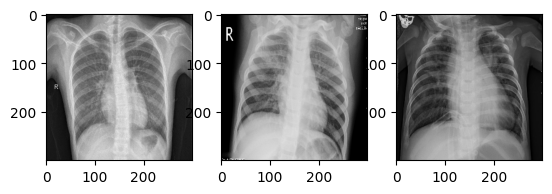

In [6]:
# Exercise Set 2 (b)
a = image.load_img(predict_path + 'normal-1.jpeg', target_size=(300,300))
b = image.load_img(predict_path + 'virus-1.jpeg', target_size=(300,300))
c = image.load_img(predict_path + 'bacteria-1.jpeg', target_size=(300,300))
fig, ax = plt.subplots(1,3)
ax[0].imshow(a)
ax[1].imshow(b)
ax[2].imshow(c)

In [7]:
# Exercise Set 2 (c)
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(directory=train_path, target_size=(300,300), \
                                                    batch_size=128, class_mode='binary')

Found 4800 images belonging to 2 classes.


In [8]:
# Exercise Set 2 (d)
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(directory=test_path, target_size=(300,300), \
                                                    batch_size=128, class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(directory=val_path, target_size=(300,300), \
                                                    batch_size=128, class_mode='binary')

Found 500 images belonging to 2 classes.
Found 556 images belonging to 2 classes.


In [63]:
# Exercise Set 2 (e)


## PYTORCH STUFF

<h3> Exercise Set 3

In [103]:
# Exercise Set 3 (a)

layers = []
numFilters = [0,16,0,32,0,64,0,64,0,64,0]

layers.append(Input(shape=(300,300,3)))
for i in range(1, 11):
    if i % 2 == 0:
        layers.append(MaxPooling2D(pool_size=(2,2)))
    elif i % 2 == 1:
        layers.append(Conv2D(filters=numFilters[i], kernel_size=(3,3), activation='relu'))
layers.append(Flatten())
layers.append(Dense(units=512, activation='relu'))
layers.append(Dense(units=1, activation='sigmoid'))

model = Sequential(layers)
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [176]:
# Exercise Set 3 (b)
model.compile(optimizer=Adam(learning_rate=5e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
# Exercise Set 3 (c)
bestCallback = ModelCheckpoint('cnn_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
history = model.fit(train_generator, batch_size=256, epochs=10, validation_data=val_generator, callbacks=[bestCallback])

Epoch 1/10


/home/adambedel/miniconda3/envs/ners590/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-10-09 17:11:39.708580: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:42: Filling up shuffle buffer (this may take a while): 5 of 8
2024-10-09 17:11:45.883899: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-10-09 17:11:45.886712: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 727482368 exceeds 10% of free system memory.
2024-10-09 17:11:49.872560: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 354041856 exceeds 10% of free system memory.
2024-10-09 17:11:53.970802: W

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7169 - loss: 0.5781
Epoch 1: val_accuracy improved from -inf to 0.91547, saving model to cnn_best_model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 367s 9s/step - accuracy: 0.7188 - loss: 0.5755 - val_accuracy: 0.9155 - val_loss: 0.2544
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9118 - loss: 0.2318
Epoch 2: val_accuracy did not improve from 0.91547
38/38 ━━━━━━━━━━━━━━━━━━━━ 321s 8s/step - accuracy: 0.9118 - loss: 0.2316 - val_accuracy: 0.8004 - val_loss: 0.4861
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9373 - loss: 0.1641
Epoch 3: val_accuracy did not improve from 0.91547
38/38 ━━━━━━━━━━━━━━━━━━━━ 316s 8s/step - accuracy: 0.9375 - loss: 0.1637 - val_accuracy: 0.8831 - val_loss: 0.2749
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9616 - loss: 0.1108
Epoch 4: val_accuracy did not improve from 0.91547
38/38 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.9617 - loss: 0.1106 - val_accuracy

In [106]:
# Not sure if checkpoint worked properly, let's save the last model to be safe
model.save('cnn_last_model.keras')

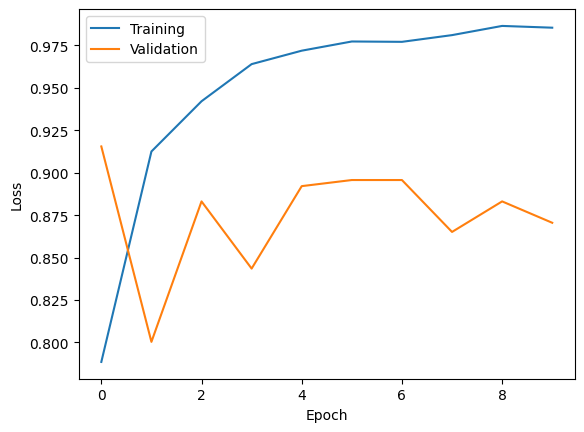

In [108]:
# Exercise Set 3 (d)
train_err=history.history['accuracy']
val_err=history.history['val_accuracy']
plt.figure()
plt.plot(train_err, label='Training')
plt.plot(val_err, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [136]:
# Exercise Set 3 (e,f)
best = load_model('cnn_best_model.keras')
best.compile(optimizer=Adam(learning_rate=5e-4), loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])
testMetrics = best.evaluate(test_generator, verbose=True)
metricsDF = pd.DataFrame(np.column_stack(testMetrics[1:4]), columns=['accuracy', 'precision', 'recall'], index=['mets'])
metricsDF.insert(3, 'f1', 2 * metricsDF['precision'] * metricsDF['recall'] \
                 / (metricsDF['precision'] + metricsDF['recall']))
print(metricsDF)

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8208 - loss: 0.3889 - precision: 0.8476 - recall: 0.9111
      accuracy  precision    recall        f1
mets     0.828   0.852941  0.911429  0.881215


              precision    recall  f1-score   support

           0       0.34      0.29      0.31       150
           1       0.71      0.76      0.74       350

    accuracy                           0.62       500
   macro avg       0.53      0.52      0.52       500
weighted avg       0.60      0.62      0.61       500

[[ 43 107]
 [ 83 267]]


<Axes: >

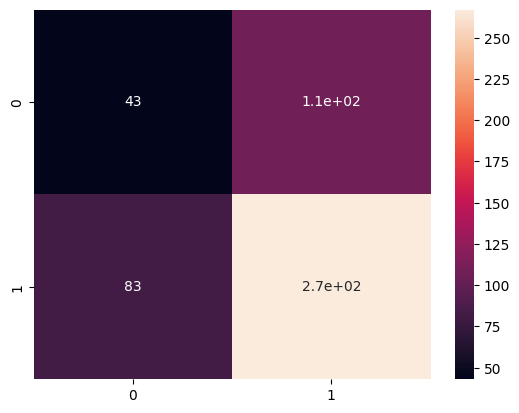

In [154]:
#predictions = best.predict(test_generator)
#predictions = predictions > 0.5
classDF = classification_report(test_generator.classes, predictions)
cm = confusion_matrix(test_generator.classes, predictions)
print(classDF)
print(cm)
sns.heatmap(cm, annot=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
bacteria-1.jpeg is pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
bacteria-2.jpeg is pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
bacteria-3.jpeg is pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
bacteria-4.jpeg is pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
bacteria-5.jpeg is pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
normal-1.jpegis normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
normal-10.jpegis normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
normal-2.jpeg is pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
normal-3.jpegis normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
normal-4.jpegis normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
normal-5.jpegis normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
normal-6.jpegis normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
normal-7.jpegis normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
normal-8.jpeg is pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
normal-9.jpegis normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
virus-1.

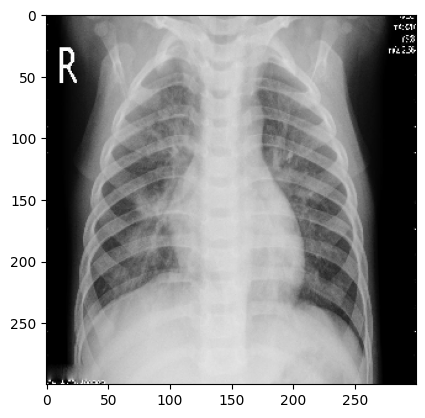

In [158]:
#get paths to all images
img_names=os.listdir(predict_path)
for fn in img_names:
  # predict images
  path = predict_path + fn
  if('Zone.Identifier' in path):
    continue
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)
  images = np.vstack([x])
  classes = best.predict(images, batch_size = 1)
  if classes[0]> 0.5:
    print(fn + ' is pneumonia')
    plt.imshow(img)
  else:
    print(fn + 'is normal')
    plt.imshow(img)

18/20 predictions were correct

<h3> Exercise Set 4

In [10]:
# Exercise Set 4
import keras
@keras.saving.register_keras_serializable()
class ResidualBlock(tf.keras.Model):
    def __init__(self, filters, stride=1, **kwargs):
        super().__init__(**kwargs)
        # Convolutional layer 1
        self.conv1 = Conv2D(filters, (3, 3), strides=stride, padding='same', use_bias=False)
        self.conv2 = Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.relu = ReLU()

        # Downsample if needed to match dimensions for the residual connection
        if stride != 1:
            self.downsample = Sequential([
                Conv2D(filters, (1, 1), strides=stride, use_bias=False),
                BatchNormalization()
            ])
        else:
            self.downsample = lambda x: x

    def call(self, x):
        identity = self.downsample(x)  # Skip connection
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x += identity  # Adding the input (skip connection) to the output
        return self.relu(x)

# ResNet Model
def create_resnet():
    inputs = Input(shape=(300,300,3))
    # Initial convolutional layer followed by batch normalization and ReLU
    x = Conv2D(16, (3, 3))(inputs)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    # Adding residual blocks
    x = ResidualBlock(filters=16)(x)
    x = MaxPooling2D((2, 2))(x)
    x = ResidualBlock(32, stride=2)(x)
    x = MaxPooling2D((2, 2))(x)
    x = ResidualBlock(64, stride=2)(x)
    x = MaxPooling2D((2, 2))(x)
    x = ResidualBlock(64)(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)

    x = Dense(512, activation='relu')(x) 
    x = Dense(1, activation='sigmoid')(x) # Output layer with sigmoid activation for classification

    return Model(inputs, x)

res_model = create_resnet()
res_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

res_model.summary()
res_model.compile(optimizer=Adam(learning_rate=5e-4), loss='binary_crossentropy', metrics=['accuracy'])
res_bestCallback = ModelCheckpoint('res_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
res_history = res_model.fit(train_generator, batch_size=256, epochs=10, validation_data=val_generator, callbacks=[res_bestCallback])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 298, 298, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_4                │ (None, 149, 149, 16)   │         4,608 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_5                │ (None, 37, 37, 32)     │        14,464 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_6                │ (None, 9, 9, 64)       │        57,600 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_7                │ (None, 4, 4, 64)       │        73,728 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,945 (1.08 MB)

 Trainable params: 282,753 (1.08 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7783 - loss: 0.4818
Epoch 1: val_accuracy improved from -inf to 0.43525, saving model to res_best_model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 282s 7s/step - accuracy: 0.7802 - loss: 0.4781 - val_accuracy: 0.4353 - val_loss: 0.7025
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9396 - loss: 0.1506
Epoch 2: val_accuracy improved from 0.43525 to 0.82374, saving model to res_best_model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 274s 7s/step - accuracy: 0.9397 - loss: 0.1503 - val_accuracy: 0.8237 - val_loss: 0.5841
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9596 - loss: 0.0977
Epoch 3: val_accuracy improved from 0.82374 to 0.87230, saving model to res_best_model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 273s 7s/step - accuracy: 0.9597 - loss: 0.0974 - val_accuracy: 0.8723 - val_loss: 0.5108
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9790 - loss: 0.0627
Epoch 4: val_accuracy did not improve from 0

In [14]:
res_best = res_model
#res_best = load_model('res_best_model.keras')
res_best.compile(optimizer=Adam(learning_rate=5e-4), loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])
res_testMetrics = res_best.evaluate(test_generator, verbose=True)
res_metricsDF = pd.DataFrame(np.column_stack(res_testMetrics[1:4]), columns=['accuracy', 'precision', 'recall'], index=['mets'])
res_metricsDF.insert(3, 'f1', 2 * res_metricsDF['precision'] * res_metricsDF['recall'] \
                 / (res_metricsDF['precision'] + res_metricsDF['recall']))
print(res_metricsDF)

/home/adambedel/miniconda3/envs/ners590/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7445 - loss: 0.8336 - precision: 0.7336 - recall: 1.0000
      accuracy  precision  recall        f1
mets     0.746   0.733753     1.0  0.846433


<h3> Exercise Set 5